this was last tested against this  version [sb-nb1](https://github.com/nocturnalastro/astropy/pull/1/commits/ab087b226988b101daa16e9b23ac0cc9e2658e41)

this basically just does fits against everything I can interms of stats,optmethods anf estmethods not very exciting 


** TODO **
* write naritive

In [1]:
import numpy as np
from astropy.modeling.models import Gaussian1D
from itertools import cycle
from astropy.modeling.astro_sherpa import SherpaFitter
from sherpa.stats import Chi2,Chi2ConstVar,Chi2DataVar,Chi2Gehrels,Chi2ModVar,Chi2XspecVar,LeastSq, CStat
from sherpa.optmethods import GridSearch,LevMar,MonCar,NelderMead
from sherpa.estmethods import Confidence,Covariance,Projection
from collections import  defaultdict
%pylab inline
from itertools import cycle

Populating the interactive namespace from numpy and matplotlib


In [2]:
model = Gaussian1D(amplitude=1.2, mean=0.9, stddev=0.53)
err = 0.6
x = np.arange(-3, 3, .1)
y=model(x)+err*np.random.uniform(-1,1,size=len(x))
yerrs=err * np.random.uniform(0.5,1,size=len(x))

true=model.copy()
model.amplitude = 2
model.mean = 0.5
model.stddev = 0.2

In [3]:
fitters=[]
for method in [GridSearch,LevMar,MonCar,NelderMead]:
    fitters.append(SherpaFitter(optimizer=method,statistic=Chi2))

In [4]:
fitted_models=[]
for ftr in fitters:
    fitted_models.append(ftr(model,x,y,yerr=yerrs))

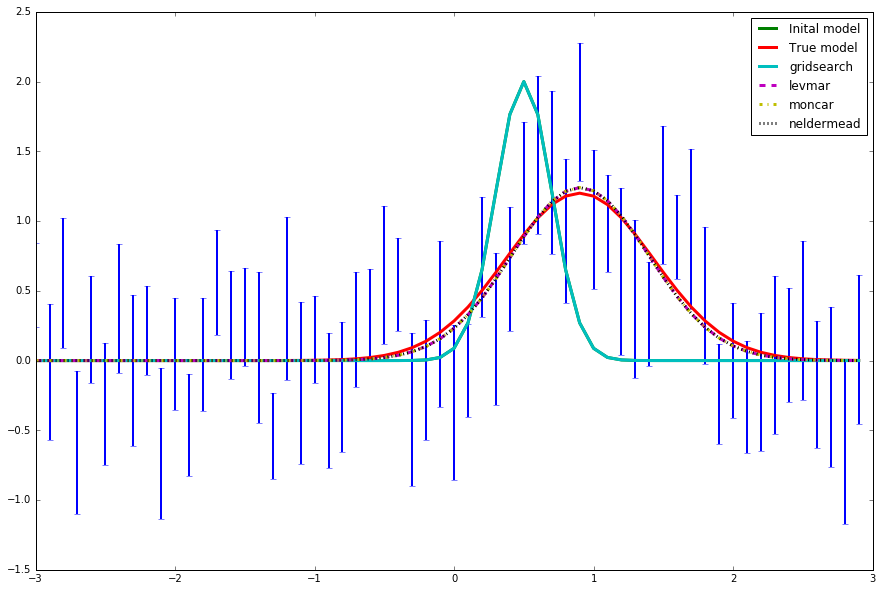

In [5]:
plt.rcParams['figure.figsize']=(15,10)
ls=cycle(["-","--","-.",":"])
plt.errorbar(x,y,yerr=yerrs,ls="",lw=2)

plt.plot(x,model(x),lw=3,label="Inital model")
plt.plot(x,true(x),lw=3,label="True model")

for n,ftmod in enumerate(fitted_models):
    plt.plot(x,ftmod(x),lw=3,label=fitters[n].fit_info.methodname,ls=ls.next())
plt.legend()

In [13]:
fitters=[]
#the other stats require a background how should we deal with that DataPHA?
#allow datakeyword so people can decide for themselfs?
for stat in [Chi2,Chi2ConstVar,Chi2DataVar,Chi2Gehrels,Chi2ModVar,Chi2XspecVar,LeastSq,CStat]:
    fitters.append(SherpaFitter(optimizer=LevMar,statistic=stat))

In [14]:
fitted_models=[]
for ftr in fitters:
    fitted_models.append(ftr(model,x,y,yerr=yerrs))

ValueError: statistic calculation failed

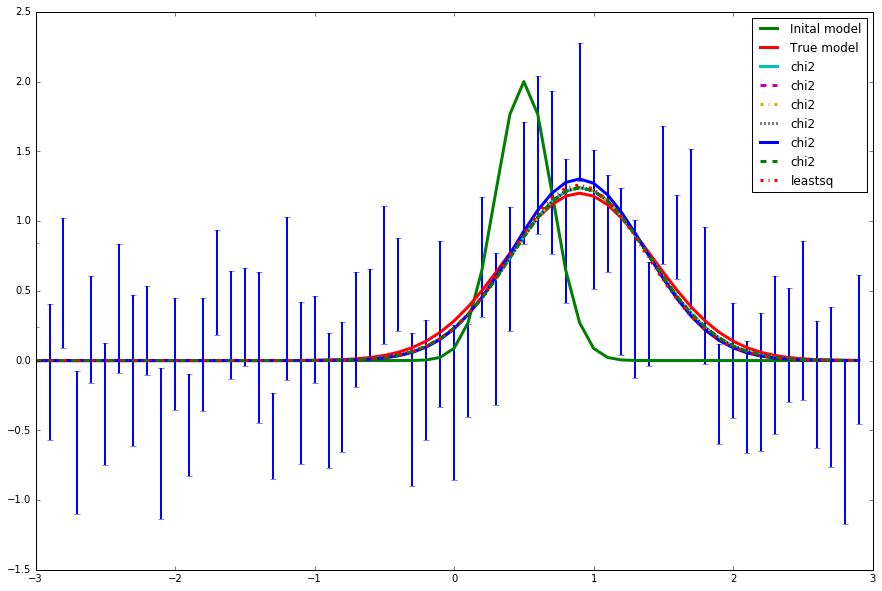

In [8]:
plt.rcParams['figure.figsize']=(15,10)
ls=cycle(["-","--","-.",":"])
plt.errorbar(x,y,yerr=yerrs,ls="",lw=2)

plt.plot(x,model(x),lw=3,label="Inital model")
plt.plot(x,true(x),lw=3,label="True model")

for n,ftmod in enumerate(fitted_models):
    plt.plot(x,ftmod(x),lw=3,label=fitters[n].fit_info.statname,ls=ls.next())
plt.legend()

In [9]:
fitters=[]
#the other stats require a background how should we deal with that DataPHA?
#allow datakeyword so people can decide for themselfs?
for estmethod in [Covariance,Confidence,Projection]:
    fitters.append(SherpaFitter(optimizer=LevMar,statistic=Chi2,estmethod=estmethod))

In [10]:
model = Gaussian1D(amplitude=5, mean=0.9, stddev=0.53)
err = 0.3
x = np.arange(-3, 3, .1)
y=model(x)+err*np.random.uniform(-1,1,size=len(x))
yerrs=err * np.random.uniform(0.5,1,size=len(x))

true=model.copy()
model.amplitude = 2
model.mean = 0.5
model.stddev = 0.2

In [11]:
fitted_models=[]
errors=[]
for ftr in fitters:
    fitted_models.append(ftr(model,x,y,yerr=yerrs))
    

In [12]:
errors=[]
for ftr in fitters:
    errors.append(ftr.est_errors(sigma=3))

wrap_.amplitude lower bound:	-0.232967
wrap_.amplitude upper bound:	0.237766
wrap_.mean lower bound:	-0.0322196
wrap_.mean upper bound:	0.0317741
wrap_.stddev lower bound:	-0.0329966
wrap_.stddev upper bound:	0.0344934
wrap_.amplitude 	lower bound: -0.232975
wrap_.amplitude 	upper bound: 0.237731
wrap_.mean 	lower bound: -0.0322016
wrap_.mean 	upper bound: 0.0317455
wrap_.stddev 	lower bound: -0.0329964
wrap_.stddev 	upper bound: 0.0345015


In [13]:
model_lowers=[]
model_uppers=[]
for n in xrange(len(errors)):
    eres=errors[n]
    model_lower=fitted_models[n].copy()
    model_upper=fitted_models[n].copy()
    for pname,pval,pmin,pmax in zip([p.split(".")[-1] for p in eres.parnames],eres.parvals,eres.parmins,eres.parmaxes):
        getattr(model_lower,pname).value=pval+pmin
        getattr(model_upper,pname).value=pval+pmax
    model_lowers.append(model_lower)
    model_uppers.append(model_upper)

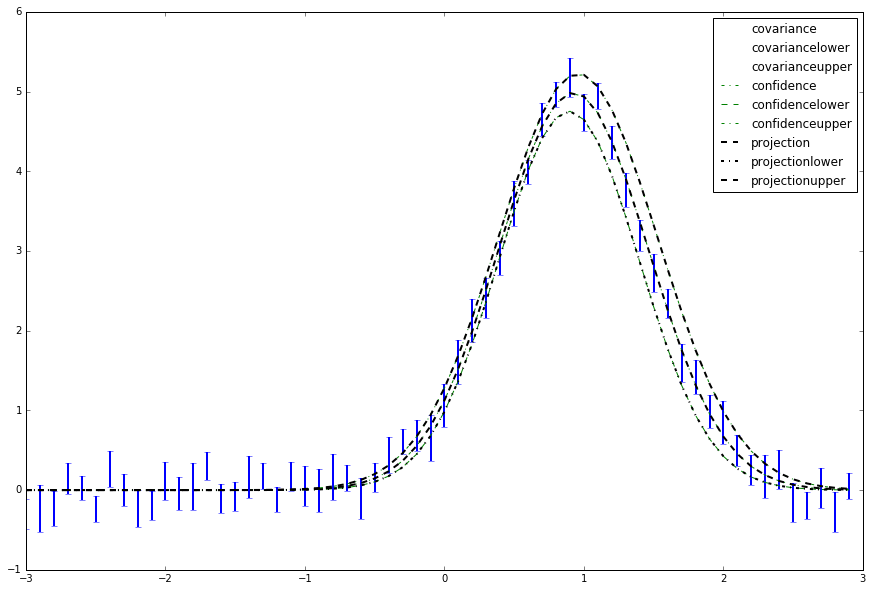

In [14]:
plt.rcParams['figure.figsize']=(15,10)
ls=cycle(["-","--","-.",":"])
plt.errorbar(x,y,yerr=yerrs,ls="",lw=2)

ls=cycle(["--","-."])

cols=['r','g','k']

for n,(ftmod,lower,upper) in enumerate(zip(fitted_models,model_lowers,model_uppers)):
    plt.plot(x,ftmod(x),lw=n,label=errors[n].methodname,ls=ls.next(), c=cols[n])
    plt.plot(x,lower(x),lw=n,label=errors[n].methodname+"lower",ls=ls.next(), c=cols[n])
    plt.plot(x,upper(x),lw=n,label=errors[n].methodname+"upper",ls=ls.next(), c=cols[n])
plt.legend()